<a href="https://colab.research.google.com/github/MeriSP/Option_Pricing_F_Sub/blob/main/Black_Scholes_ValidationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing necessary libraries**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import norm

**2. Connecting with dataset**

In [2]:
# Step 1. Upload file "AlgoSeek_SPy500Jun172022.csv" to Google Colab Document
df = pd.read_csv('/content/sample_data/AlgoSeek_SPy500Jun172022.csv')
df.head(5)

,No,date,TimeBarStart,year,month,day,hour,minute,ticker,call,strike,expiration_date,option_price,underlying_price,moneyness,days_to_ex,std_underlying,treasury_rate
0,1,20220103,10:01:00 AM,2022,1,3,10,1,SPY,C,500,6/17/2022,9.33,475.535,0.95107,118,0.001322,0.22
1,2,20220103,10:05:00 AM,2022,1,3,10,5,SPY,C,500,6/17/2022,9.16,475.195,0.95039,118,0.001181,0.22
2,3,20220103,10:37:00 AM,2022,1,3,10,37,SPY,C,500,6/17/2022,9.37,475.995,0.95199,118,0.001080,0.22
3,4,20220103,11:11:00 AM,2022,1,3,11,11,SPY,C,500,6/17/2022,9.20,475.565,0.95113,118,0.001175,0.22
4,5,20220103,11:18:00 AM,2022,1,3,11,18,SPY,C,500,6/17/2022,9.07,475.240,0.95048,118,0.001065,0.22


In [3]:
# Creating a new column with datatime module.
df['datetime'] = df[['year', 'month', 'day', 'hour', 'minute']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour'], minute=row['minute']), axis=1)
# Sorting values in ascending order
df.sort_values('datetime', ascending=True, inplace=True)
df['datetime'].head()

0   2022-01-03 10:01:00
1   2022-01-03 10:05:00
2   2022-01-03 10:37:00
3   2022-01-03 11:11:00
4   2022-01-03 11:18:00
Name: datetime, dtype: datetime64[ns]

In [4]:
# Cleaning the dataframe, selecting feature variables and output for the model.
option_df = df[['datetime', 'underlying_price', 'strike','days_to_ex', 'treasury_rate', 'std_underlying', 'option_price']].copy()
option_df.head()

,datetime,underlying_price,strike,days_to_ex,treasury_rate,std_underlying,option_price
0,2022-01-03 10:01:00,475.535,500,118,0.22,0.001322,9.33
1,2022-01-03 10:05:00,475.195,500,118,0.22,0.001181,9.16
2,2022-01-03 10:37:00,475.995,500,118,0.22,0.001080,9.37
3,2022-01-03 11:11:00,475.565,500,118,0.22,0.001175,9.20
4,2022-01-03 11:18:00,475.240,500,118,0.22,0.001065,9.07


In [5]:
# Spliting the data while mantaining the order of the dataset.
split_date = datetime.datetime(year=2022, month=3, day=10, hour=0)
df_train = option_df.loc[df['datetime']<split_date].copy()
df_val = option_df.loc[df['datetime']>=split_date].copy()
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)


Shape of train: (4008, 7)
Shape of test: (1045, 7)


**3. Black-Scholes for options**

In [6]:
# Black-Scholes for option calls:

def black_scholes_call(row):
    S = row.underlying_price
    K = row.strike
    T = row.days_to_ex/252
    r = row.treasury_rate
    σ = row.std_underlying
    d1 = (np.log(S / K) + (r + (σ ** 2) / 2) * T) / (σ * (T ** .5))
    d2 = d1 - σ * (T ** .5)
    C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return C

In [7]:
df_val['black_scholes_pred'] = df_val.apply(black_scholes_call, axis=1)
df_val.head()

,datetime,underlying_price,strike,days_to_ex,treasury_rate,std_underlying,option_price,black_scholes_pred
4008,2022-03-10 09:30:00,422.755,500,72,0.38,0.004437,0.65,2.057250e-139
4009,2022-03-10 09:31:00,422.455,500,72,0.38,0.004218,0.68,1.459215e-157
4010,2022-03-10 09:32:00,422.235,500,72,0.38,0.004123,0.63,1.462769e-167
4011,2022-03-10 09:34:00,422.935,500,72,0.38,0.004532,0.67,6.768167e-132
4012,2022-03-10 09:35:00,422.800,500,72,0.38,0.004523,0.68,8.291985e-134


In [8]:
df_val['black_scholes_pred']

4008    2.057250e-139
4009    1.459215e-157
4010    1.462769e-167
4011    6.768167e-132
4012    8.291985e-134
            ...      
5048     6.901072e+00
5049     6.136072e+00
5050     6.891072e+00
5051     6.756072e+00
5052     6.546072e+00
Name: black_scholes_pred, Length: 1045, dtype: float64

In [9]:
df_val['black_scholes_pred'].describe()

count     1.045000e+03
mean      8.625819e+00
std       7.959661e+00
min       0.000000e+00
25%      1.575106e-308
50%       9.045838e+00
75%       1.661139e+01
max       2.347484e+01
Name: black_scholes_pred, dtype: float64

**4. Results/ Performance Metrics**

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [11]:
actual_option_df = df_val[['option_price']].copy()
actual_option_df.shape
# Found input variables with inconsistent numbers of samples: [1045, 1040]

(1045, 1)

In [12]:
BS_predicted_option_df = df_val[['black_scholes_pred']].copy()
BS_predicted_option_df.shape

(1045, 1)

In [13]:
def compute_metrics():
  rmse = sqrt(mean_squared_error(actual_option_df, BS_predicted_option_df))
  mae = mean_absolute_error(actual_option_df, BS_predicted_option_df)
  mape = mean_absolute_percentage_error(actual_option_df, BS_predicted_option_df)
  r_squared = r2_score(actual_option_df, BS_predicted_option_df)
  return rmse, mae, mape, r_squared

In [14]:
rmse, mae, mape, r_squared = compute_metrics()

print('RMSE for the validation set:', round(rmse, 4))
print('MAE for the validation set:', round(mae, 4))
print('MAPE for the validation set:', round(mape, 4))
print('R Squared for the validation set:', round(r_squared, 4))

RMSE for the validation set: 10.9415
MAE for the validation set: 8.202
MAPE for the validation set: 7.9477
R Squared for the validation set: -1821.2483


Text(0.5, 0, 'Time series')

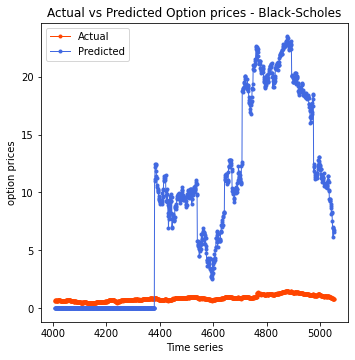

In [15]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(df_val['option_price'], linestyle='-', marker='.', linewidth=1, color='orangered')
plt.plot(BS_predicted_option_df, linestyle='-', marker='.', linewidth=1, color='royalblue')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Option prices - Black-Scholes')
plt.ylabel('option prices')
plt.xlabel('Time series')
# plt.savefig('plots/ch5/B07887_05_09.png', format='png', dpi=300)